# **Tugas 10 - Implementasi Reduksi Dimensi PCA dan Fuzzy C-Means untuk Clustering Data**

Nama : Isnita Widyur Rahmah
NIM : 220411100048
Kelas : IF 7A

Link Project : https://github.com/nittyaa99/ppw

## Install Library

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00


## Import Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load Data

In [4]:
file_path = "berita_vsm.csv"
data = pd.read_csv(file_path)

data

,Kategori,abroad,absolut,acara,achmad,acu,adab,adam,adaptif,adb,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055924,0.0,0.0
2,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.044704,0.000000,0.0,0.0
3,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.052317,0.000000,0.000000,0.0,0.000000,0.084570,0.000000,0.0,0.0
4,Ekonomi,0.0,0.054469,0.0,0.0,0.0,0.0,0.054469,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.062649,0.0,0.000000,0.000000,0.000000,0.0,0.0
96,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.040965,0.000000,0.0,0.081929,0.000000,0.000000,0.0,0.0
97,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
98,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


## Memisahkan Label dan Fitur

In [6]:
labels = data['Kategori']
features = data.drop('Kategori', axis=1).values

## Mengubah Label Menjadi Numerik dengan Label Encoding

In [7]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

## Clustering dengan PCA dan Fuzzy C-Means
Fuzzy C-Means (FCM) adalah metode clustering yang memperbolehkan sebuah data menjadi anggota lebih dari satu cluster dengan derajat keanggotaan tertentu (bukan hanya keanggotaan keras seperti pada K-Means).
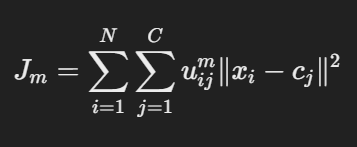
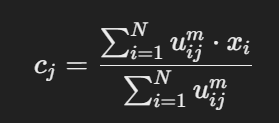
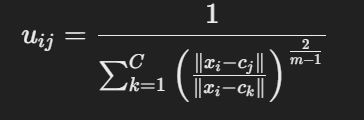

In [8]:
results = {}

# Fuzzy C-Means Clustering dan PCA untuk dimensi yang berbeda
max_dim = min(features.shape[1], 100)

for dim in range(max_dim, 1, -1):
    # Kurangi dimensi data
    pca = PCA(n_components=dim)
    reduced_features = pca.fit_transform(features)

    # Fuzzy C-Means Clustering
    cntr, u, u0, d, jm, p, fpc = cmeans(
        data=reduced_features.T,
        c=2,                  # 2 clusters
        m=2.0,                # Tingkat fuzziness
        error=0.005,          # Toleransi error
        maxiter=1000          # Iterasi maksimum
    )

    # Keanggotaan cluster
    cluster_membership = np.argmax(u, axis=0)

    # Hitung akurasi berdasarkan label asli
    accuracy = max(
        accuracy_score(encoded_labels, cluster_membership),
        accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
    )

    # Simpan hasil
    results[dim] = {
        'pca_features': reduced_features,
        'centroids': cntr,
        'membership': cluster_membership,
        'accuracy': accuracy
    }

## Menentukan Dimensi dengan Akurasi Terbaik

In [9]:
best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
best_accuracy = results[best_dim]['accuracy']

print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")

Akurasi terbaik: 0.97 pada dimensi 42.


## Scatter Plot untuk Dimensi Terbaik

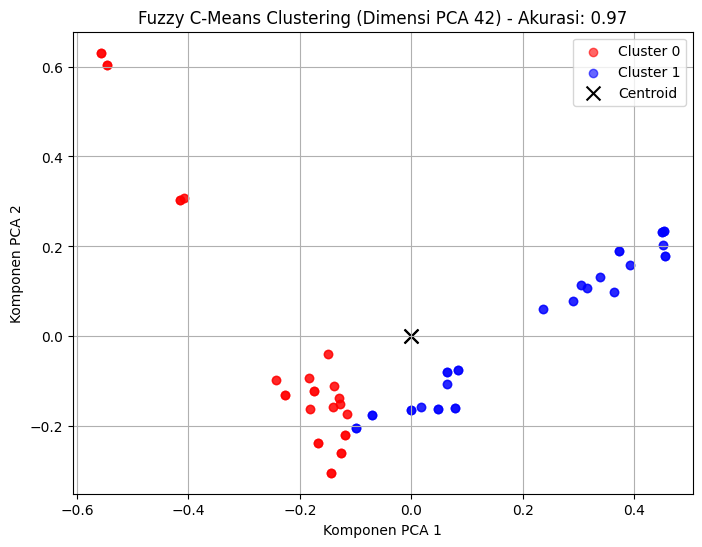

In [10]:
# Scatter plot untuk dimensi terbaik (2 dimensi)
final_result = results[best_dim]
pca_features = final_result['pca_features']
centroids = final_result['centroids']
membership = final_result['membership']
accuracy = final_result['accuracy']

plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = pca_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA {best_dim}) - Akurasi: {accuracy:.2f}")
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.legend()
plt.grid()
plt.show()

## Scatter Plot untuk Dimensi 2

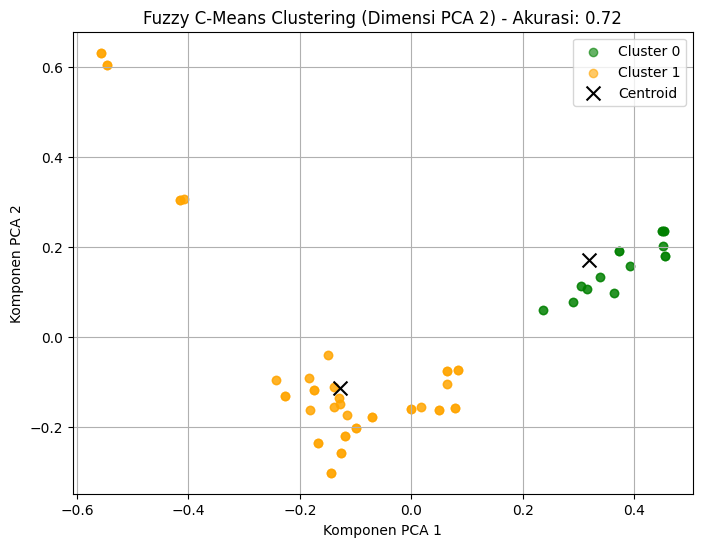

In [11]:
final_result_2d = results[2]
pca_features_2d = final_result_2d['pca_features']
centroids_2d = final_result_2d['centroids']
membership_2d = final_result_2d['membership']
accuracy_2d = final_result_2d['accuracy']

# Scatter Plot untuk Dimensi 2
plt.figure(figsize=(8, 6))
colors = ['green', 'orange']
for i in range(2):  # Untuk 2 cluster
    cluster_points = pca_features_2d[membership_2d == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Tambahkan centroid
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi PCA 2) - Akurasi: {accuracy_2d:.2f}")
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.legend()
plt.grid()
plt.show()

## Menampilkan Akurasi per Dimensi

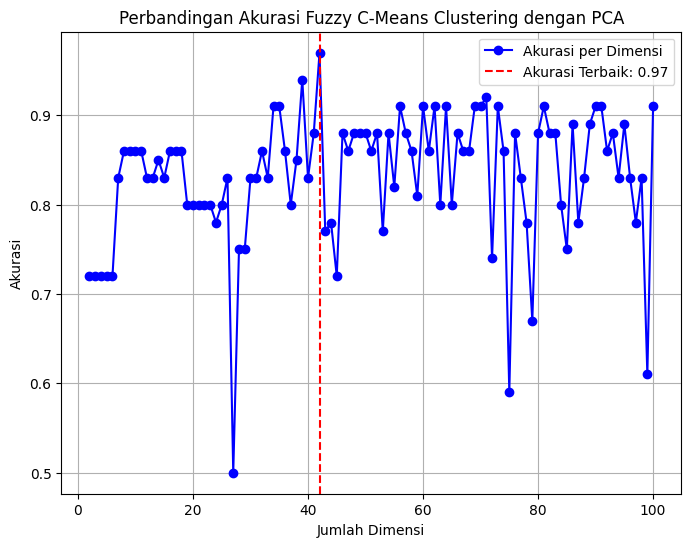

In [12]:
dim_list = list(results.keys())
accuracy_list = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(8, 6))
plt.plot(dim_list, accuracy_list, marker='o', color='b', linestyle='-', label="Akurasi per Dimensi")
plt.xlabel("Jumlah Dimensi")
plt.ylabel("Akurasi")
plt.title(f"Perbandingan Akurasi Fuzzy C-Means Clustering dengan PCA")
plt.axvline(best_dim, color='r', linestyle='--', label=f"Akurasi Terbaik: {best_accuracy:.2f}")
plt.legend()
plt.grid(True)
plt.show()

## Akurasi tiap Dimensi

In [13]:
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")

Dimensi: 100, Akurasi: 0.91
Dimensi: 99, Akurasi: 0.61
Dimensi: 98, Akurasi: 0.83
Dimensi: 97, Akurasi: 0.78
Dimensi: 96, Akurasi: 0.83
Dimensi: 95, Akurasi: 0.89
Dimensi: 94, Akurasi: 0.83
Dimensi: 93, Akurasi: 0.88
Dimensi: 92, Akurasi: 0.86
Dimensi: 91, Akurasi: 0.91
Dimensi: 90, Akurasi: 0.91
Dimensi: 89, Akurasi: 0.89
Dimensi: 88, Akurasi: 0.83
Dimensi: 87, Akurasi: 0.78
Dimensi: 86, Akurasi: 0.89
Dimensi: 85, Akurasi: 0.75
Dimensi: 84, Akurasi: 0.80
Dimensi: 83, Akurasi: 0.88
Dimensi: 82, Akurasi: 0.88
Dimensi: 81, Akurasi: 0.91
Dimensi: 80, Akurasi: 0.88
Dimensi: 79, Akurasi: 0.67
Dimensi: 78, Akurasi: 0.78
Dimensi: 77, Akurasi: 0.83
Dimensi: 76, Akurasi: 0.88
Dimensi: 75, Akurasi: 0.59
Dimensi: 74, Akurasi: 0.86
Dimensi: 73, Akurasi: 0.91
Dimensi: 72, Akurasi: 0.74
Dimensi: 71, Akurasi: 0.92
Dimensi: 70, Akurasi: 0.91
Dimensi: 69, Akurasi: 0.91
Dimensi: 68, Akurasi: 0.86
Dimensi: 67, Akurasi: 0.86
Dimensi: 66, Akurasi: 0.88
Dimensi: 65, Akurasi: 0.80
Dimensi: 64, Akurasi: 0.91
